In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import os
import numpy as np
from matplotlib import pyplot

from scipy import optimize
%matplotlib inline

In [109]:
data = np.loadtxt(os.path.join('/content/drive/MyDrive/colab/2doparcial/datasets/breast-cancer-wisconsin.txt'), delimiter=',')
data = data[:600]
data_trainer = data[600:]

X, y = data[:, :10], data[:, 10]
y[y == 2] = 0
y[y == 4] = 1
M, N = X.shape

In [110]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

In [111]:
def calcularCosto(theta, X, y):
    m = y.size  # numero de ejemplos de entrenamiento
    p = X.dot(theta.T)
    h = sigmoid(p)
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))    
    return J

In [112]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0] # numero de ejemplos de entrenamiento
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [113]:
def normalizacion_media(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma   
    return X_norm, mu, sigma

In [114]:
X_norm, mu, sigma = normalizacion_media(X)

In [115]:
X = X_norm
m, n = X.shape
X = np.concatenate([np.ones((m, 1), dtype=int), X], axis=1)
X.shape

(600, 11)

11 theta calculado por el descenso por el gradiente: [-0.64800825 -0.01942753  0.93338914  0.59452611  0.72687658  0.49292666
  0.38077914  0.98037446  0.68396086  0.45760714  0.50458901]


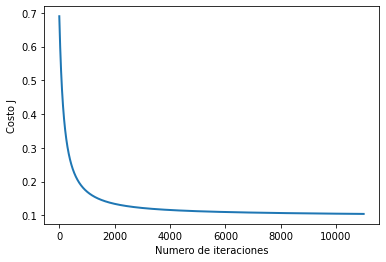

In [122]:
alpha = 0.003
num_iters = 11000

theta = np.zeros(N+1)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

pyplot.plot(np.arange(len(J_history)), J_history,lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('{} theta calculado por el descenso por el gradiente: {:s}'.format(len(theta),str(theta)))

In [124]:
X_array = [1,1017122,8,10,10,8,7,10,9,7,1]
aprueba = sigmoid(np.dot(X_array, theta))
print(':{:.2f}'.format(aprueba));

:0.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
